[![GitHub](https://badgen.net/badge/icon/github?icon=github&label)](https://github.com/GuitarsAI/TopicsInAudioAndMusicTech)
<div>
<center>
<img src="https://github.com/GuitarsAI/TopicsInAudioAndMusicTech/blob/main/images/basicRoomAcoustics_header.jpg?raw=1" width="1200" height="400">
</center>
</div>



In [1]:
!pip install pyroomacoustics

     |████████████████████████████████| 1.1 MB 28.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached pybind11-2.8.0-py2.py3-none-any.whl (207 kB)
  Created wheel for pyroomacoustics: filename=pyroomacoustics-0.5.0-cp37-cp37m-linux_x86_64.whl size=9752642 sha256=3ec3eea229dc5c2a220d939c66c18a4061d8c56dd79d5f8a4c6eeeb55bd7babc
  Stored in directory: /root/.cache/pip/wheels/73/30/ca/a88fac6fba8c90101f115ee4c54b4579ad908665d8b96942f5
Successfully built pyroomacoustics


## Import Packages

In [2]:
import pyroomacoustics as pra
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

## Create a non-Convex Room


### Floor Shape

In [3]:
# Create the 2D shape
floor = np.array([[0, 0], [0, 10], [10, 7.5], [7.5, 6], [5, 6], [5, 0]]).T

### Wall Materials

In [4]:
# Materials
pra.materials_data

{'absorption': {'Audience (unless not specified explicitly, 2 persons per m2)': {'audience_0.72_m2': {'coeffs': [0.1,
     0.21,
     0.41,
     0.65,
     0.75,
     0.71],
    'description': 'Audience area, 0.72 persons / m2'},
   'audience_1.5_m2': {'coeffs': [0.22, 0.38, 0.71, 0.95, 0.99, 0.99],
    'description': 'Audience area, 1.5 persons / m2'},
   'audience_1_m2': {'coeffs': [0.16, 0.29, 0.55, 0.8, 0.92, 0.9],
    'description': 'Audience area, 1 person / m2'},
   'audience_2_m2': {'coeffs': [0.26, 0.46, 0.87, 0.99, 0.99, 0.99],
    'description': 'Audience area, 2 persons / m2'},
   'audience_orchestra_choir': {'coeffs': [0.6,
     0.74,
     0.88,
     0.96,
     0.93,
     0.85,
     0.85],
    'description': 'Areas with audience, orchestra or choir including narrow aisles'},
   'audience_upholstered_chairs_1': {'coeffs': [0.72,
     0.82,
     0.91,
     0.93,
     0.94,
     0.87],
    'description': 'Audience in moderately upholstered chairs 0,85 m × 0,63 m'},
   'audien

In [5]:
materials = pra.Material('ceramic_tiles')

### Create the Room

In [6]:
room = pra.Room.from_corners(
    floor,
    fs=16000,
    materials=materials,
    max_order=3,
    ray_tracing=True,
    air_absorption=True,
)

### Floor and Ceiling Materials

In [7]:
floor_and_ceiling_mat = pra.make_materials(
    ceiling="hard_surface",
    floor="carpet_cotton")

### Extrude the Floor to Create a 3D Room

In [8]:
height = 3.5
room.extrude(height, materials=floor_and_ceiling_mat)

## Get an Audio File to be used as Source Signal

In [9]:
!wget https://github.com/LCAV/pyroomacoustics/raw/master/examples/input_samples/german_speech_8000.wav
y, sr = librosa.load('german_speech_8000.wav', sr=16000)

--2021-10-25 17:44:58--  https://github.com/LCAV/pyroomacoustics/raw/master/examples/input_samples/german_speech_8000.wav
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LCAV/pyroomacoustics/master/examples/input_samples/german_speech_8000.wav [following]
--2021-10-25 17:44:59--  https://raw.githubusercontent.com/LCAV/pyroomacoustics/master/examples/input_samples/german_speech_8000.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30144 (29K) [audio/wav]
Saving to: ‘german_speech_8000.wav’

german_speech_8000. 100%[===================>]  29.44K  --.-KB/s    in 0s      

2021-10-25 17:44:59 (11

In [10]:
ipd.Audio(y, rate=sr)

## Add a Source and a Microphone

In [11]:
# # Add a source somewhere in the room
room.add_source([2, 7, 2], signal=y)

# Add a microphone
room.add_microphone([1, 1, 1])

### Plot the Room

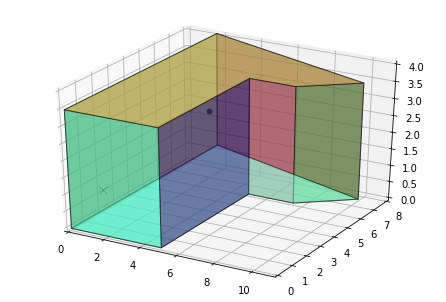

In [12]:
fig, ax = room.plot(mic_marker_size=60)
ax.set_xlim([0,11])
ax.set_ylim([0,8])
ax.set_zlim([0,4]);

## Simulate the Room

RT60: 9.7446875


<Figure size 432x288 with 0 Axes>

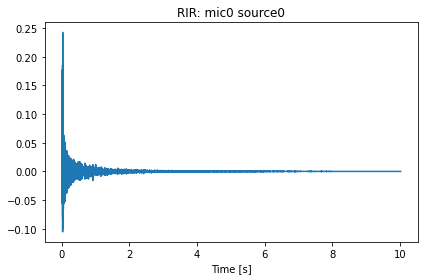

In [13]:
room.set_ray_tracing(receiver_radius=0.5)
room.compute_rir()
print("RT60:", room.measure_rt60()[0, 0])
plt.figure()
room.plot_rir()
plt.show()


In [14]:
room.simulate()
audio_reverb = room.mic_array.to_wav("output.wav", norm=True, bitdepth=np.int16)

In [15]:
ipd.Audio('output.wav')